In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('C:\\Users\\Admin\\Documents\\AI02\\WEEK2\\heart.csv')

### Initial Data Exploration

In [19]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
dataset.describe() .T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Distinguish Attributes

In [27]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

### Univariate Analysis

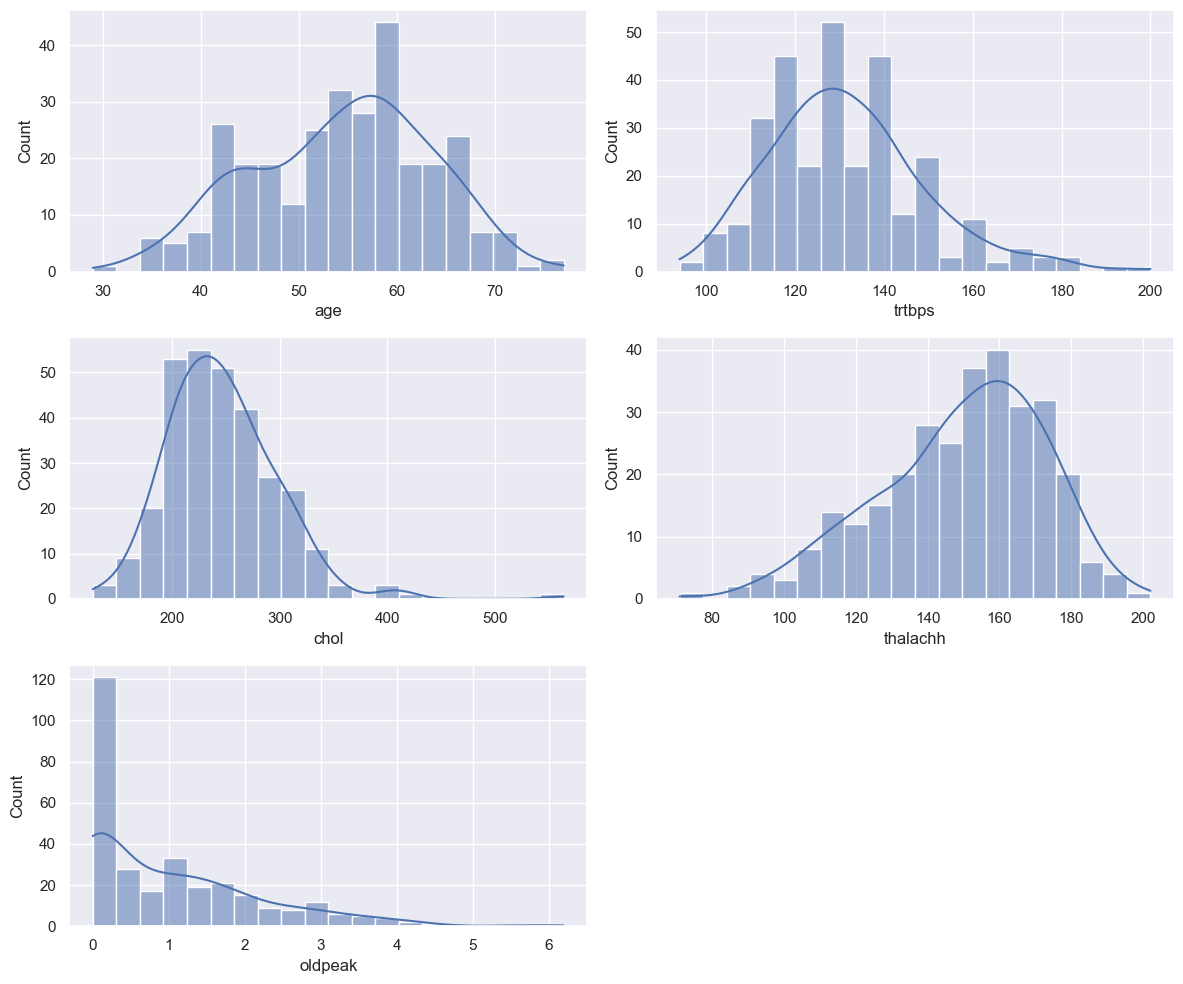

In [34]:
sns.set_theme()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
  sns.histplot(dataset, x=col, kde=True, ax=axes[i], bins=20)
axes[-1].axis('off')
plt.tight_layout()
plt.show()

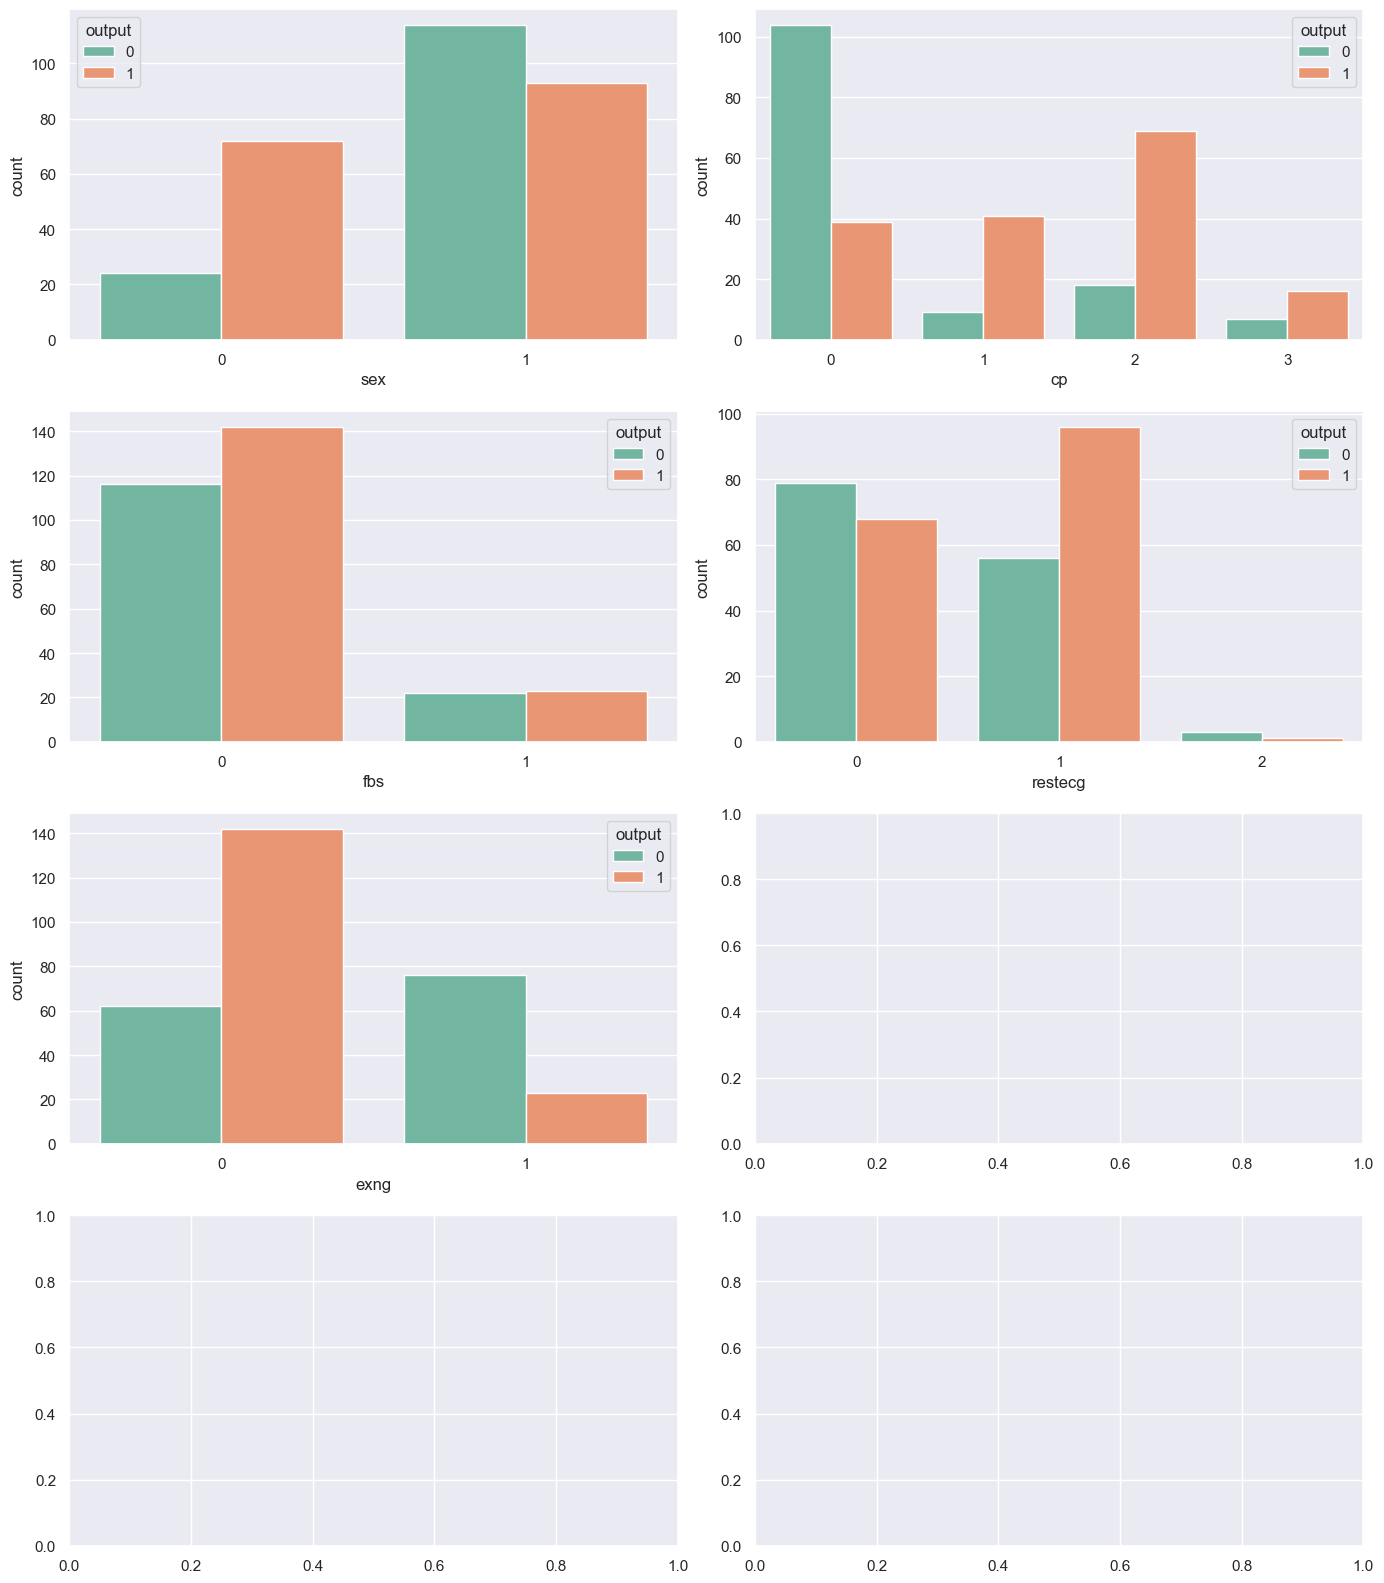

In [44]:
sns.set_theme()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(dataset, x=col, hue='output', ax=axes[i], palette='Set2')
plt.tight_layout()
plt.show()

### Bivariate Analysis - Multivariate Statistics

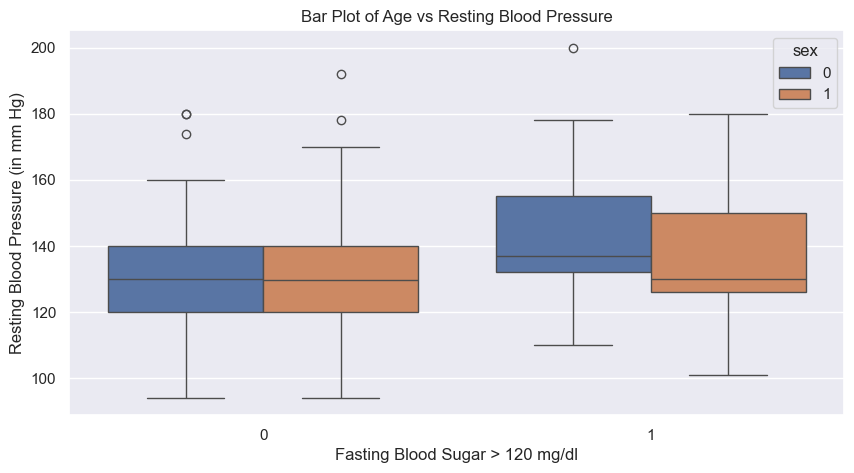

In [36]:
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.boxplot(x='fbs', y='trtbps', data=dataset, hue='sex')
plt.title('Box Plot of Fasting Blood Sugar vs Resting Blood Pressure')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Resting Blood Pressure (in mm Hg)')
plt.show()

=> Đối với những người đường huyết bình thường, họ có huyết áp khá ổn định và đạt tiêu chuẩn (khoảng 135 mmHg) và không có sự chênh lệch huyết áp giữa nam và nữ.
=> Đối với những người bị đường huyết cao, họ có lượng huyết áp cao hơn hẳn mức trung bình. Đồng thời, có sự chênh lệch huyết áp rõ rệt giữa 2 giới tính (cho thấy nam có thói quen hoặc thể chất khiến cho đường huyết cao hơn của nữ).

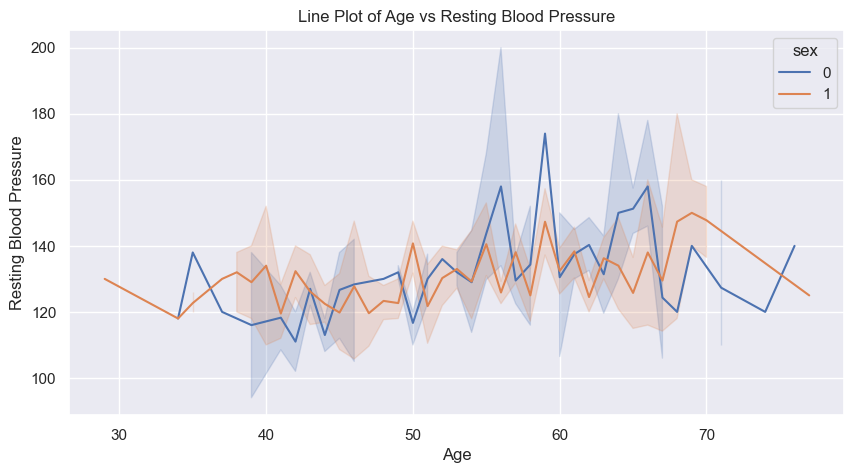

In [52]:
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.lineplot(data=dataset, x="age", y="trtbps", hue="sex")
plt.title('Line Plot of Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

In [50]:
correlation = dataset['trtbps'].corr(dataset['chol'])
print(correlation)

0.1231742065323907


=> Càng về già, lượng cholesterol tăng nhẹ + huyết áp và lượng cholesterol tỉ lệ thuận -> cholesterol và tuổi già cx có thể là nguyên do của bệnh đau tim.

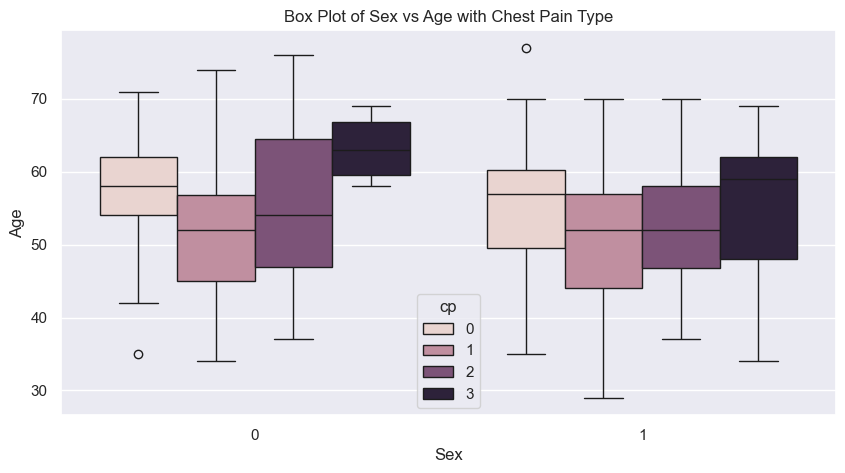

In [49]:
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.boxplot(x='sex', y='age', data=dataset, hue='cp')
plt.title('Box Plot of Sex vs Age with Chest Pain Type')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

=> Ở nữ, việc đau thắt ngực loại 2 gặp khá phổ biến. Còn ở nam, các loại đau tức ngực phân bố khá đều -> nội tiết hormone có thể là yếu tố quyết định loại đau thắt ngực và đau tim.